In [ ]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. LSTMs and CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "autoencoders"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
def plot_image(image):
  plt.imshow(image,cmap='binary')
  plt.axis("off")

In [ ]:
np.random.seed(4)

In [ ]:
def generate_3d_data(m,w1=0.1,w2=0.3,noise=0.1):
  angles=np.random.rand(m)*3*np.pi/2-0.5
  data=np.empty((m,3))
  data[:,0]=np.cos(angles)+np.sin(angles)/2+noise*np.random.randn(m)/2
  data[:,1]=np.sin(angles)*0.7+noise*np.random.randn(m)/2
  data[:,2]=data[:,0]*w1+data[:,1]*w2+noise*np.random.randn(m)
  return data

In [ ]:
X_train=generate_3d_data(60)


In [ ]:
np.random.rand(60)

In [ ]:
np.empty((60,3))

In [ ]:
X_train

In [ ]:
[3,2,1]+[4,3,2]+[8]

[3, 2, 1, 4, 3, 2, 8]

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
encoder=keras.models.Sequential([keras.layers.Dense(2,input_shape=[3])])
decoder=keras.models.Sequential([keras.layers.Dense(3,input_shape=[2])])
autoencoder=keras.models.Sequential([encoder,decoder])

In [ ]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 2)                 8         
_________________________________________________________________
sequential_1 (Sequential)    (None, 3)                 9         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1.5))

In [ ]:

history = autoencoder.fit(X_train, X_train, epochs=20)

Epoch 1/20
2/2 [==============================] - 2s 8ms/step - loss: 0.2993
Epoch 2/20
2/2 [==============================] - 0s 6ms/step - loss: 0.2823
Epoch 3/20
2/2 [==============================] - 0s 7ms/step - loss: 0.1921
Epoch 4/20
2/2 [==============================] - 0s 7ms/step - loss: 0.0713
Epoch 5/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0550
Epoch 6/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0451
Epoch 7/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0432
Epoch 8/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0306
Epoch 9/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0214
Epoch 10/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0167
Epoch 11/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0118
Epoch 12/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0099
Epoch 13/20
2/2 [==============================] - 0s 5ms/step - loss: 0.

In [ ]:
codings=encoder.predict(X_train)

Saving figure linear_autoencoder_pca_plot


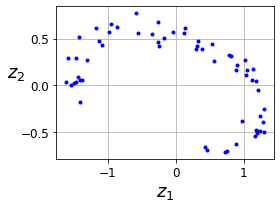

In [ ]:
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
save_fig("linear_autoencoder_pca_plot")
plt.show()

In [ ]:
codings[:10]

array([[-1.499151  ,  0.02759156],
       [ 0.30111563,  0.38734335],
       [-1.3750305 ,  0.0569079 ],
       [-0.9468616 ,  0.6561595 ],
       [-0.8661734 ,  0.6193477 ],
       [ 1.2298753 , -0.32384384],
       [-1.6103843 ,  0.03732466],
       [ 0.43031335, -0.65290344],
       [ 1.209015  , -0.04707713],
       [ 0.8931484 ,  0.21672   ]], dtype=float32)

In [ ]:
X_train[:10]

array([[-1.01570027, -0.55091331, -0.26132626],
       [-0.00771675,  0.59958572,  0.03507755],
       [-0.95317135, -0.46453691, -0.24920288],
       [-0.92012304,  0.21009593,  0.02182381],
       [-0.76309739,  0.158261  ,  0.19152496],
       [ 1.11816122,  0.32508721,  0.31710572],
       [-1.02258878, -0.64384064, -0.13368695],
       [ 0.67351984, -0.27342519, -0.00787835],
       [ 1.01619558,  0.51546608,  0.46783297],
       [ 0.54957723,  0.67728016,  0.2340159 ]])

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
def rounded_accuracy(y_true,y_pred):
  return keras.metrics.binary_accuracy(tf.round(y_true),tf.round(y_pred))
  

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])

In [ ]:
stacked_ae.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_6 (Sequential)    (None, 30)                81530     
_________________________________________________________________
sequential_7 (Sequential)    (None, 28, 28)            82284     
Total params: 163,814
Trainable params: 163,814
Non-trainable params: 0
_________________________________________________________________


In [ ]:
stacked_ae.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(lr=1.5), metrics=[rounded_accuracy])
history = stacked_ae.fit(X_train, X_train, epochs=20,
                         validation_data=(X_valid, X_valid))

Epoch 1/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3815 - rounded_accuracy: 0.8487 - val_loss: 0.3166 - val_rounded_accuracy: 0.9002
Epoch 2/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3083 - rounded_accuracy: 0.9127 - val_loss: 0.3021 - val_rounded_accuracy: 0.9198
Epoch 3/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2998 - rounded_accuracy: 0.9204 - val_loss: 0.2986 - val_rounded_accuracy: 0.9198
Epoch 4/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2959 - rounded_accuracy: 0.9240 - val_loss: 0.2938 - val_rounded_accuracy: 0.9286
Epoch 5/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2928 - rounded_accuracy: 0.9268 - val_loss: 0.2919 - val_rounded_accuracy: 0.9286
Epoch 6/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2920 - rounded_accuracy: 0.9283 - val_loss: 0.2914 - val_rounded_accuracy: 0.9305
Epoch 7/20
1719/1719 [==================

In [ ]:
def show_reconstructions(model,images=X_valid,n_images=5):
  reconstruction=model.predict(images[:n_images])
  fig=plt.figure(figsize=(n_images*1.5,3))
  for image_index in range(n_images):
    plt.subplot(2,n_images,1+image_index)
    plot_image(images[image_index])
    plt.subplot(2,n_images,1+n_images+image_index)
    plot_image(reconstruction[image_index])

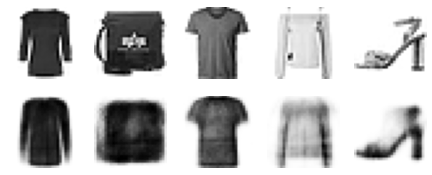

In [ ]:
show_reconstructions(stacked_ae)



In [ ]:

np.random.seed(42)

from sklearn.manifold import TSNE

X_valid_compressed = stacked_encoder.predict(X_valid)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)
X_valid_2D = (X_valid_2D - X_valid_2D.min()) / (X_valid_2D.max() - X_valid_2D.min())

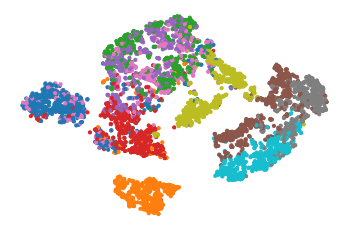

In [ ]:
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap="tab10")
plt.axis("off")
plt.show()


Saving figure fashion_mnist_visualization_plot


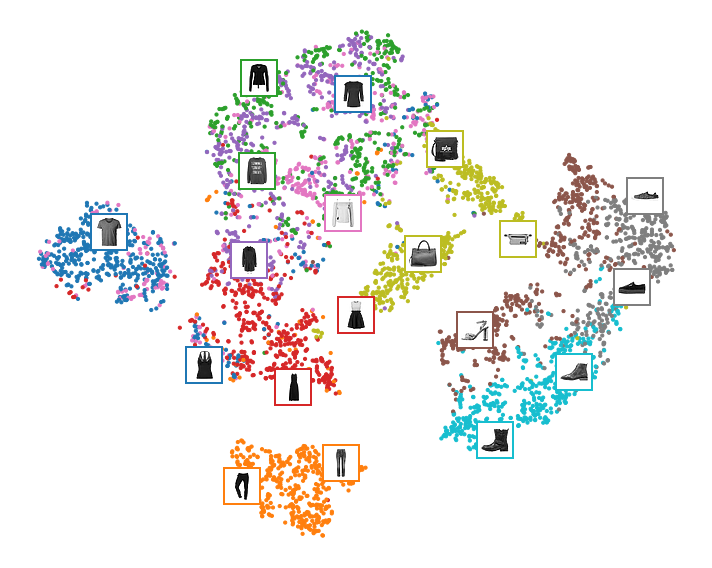

In [ ]:
plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(X_valid_2D):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_valid[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_valid[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
save_fig("fashion_mnist_visualization_plot")
plt.show()

In [ ]:
class DenseTranspose(keras.layers.Layer):
  def __init__(self,dense,activation=None,**kwargs):
    self.dense=dense
    self.activation=keras.activations.get(activation)
    super().__init__(**kwargs)
  def build(self,batch_input_shape):
    self.biases=self.add_weight(name="bias",shape=[self.dense.input_shape[-1]],initializer="zeros")
    super().build(batch_input_shape)
  def call(self,inputs):
    z=tf.matmul(inputs,self.dense.weights[0],transpose_b=True)
    return self.activation(z+self.biases)

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

dense_1 = keras.layers.Dense(100, activation="selu")
dense_2 = keras.layers.Dense(30, activation="selu")

tied_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    dense_1,
    dense_2
])


In [ ]:
tied_decoder = keras.models.Sequential([
    DenseTranspose(dense_2, activation="selu"),
    DenseTranspose(dense_1, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])


In [ ]:
tied_ae = keras.models.Sequential([tied_encoder, tied_decoder])

tied_ae.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1.5), metrics=[rounded_accuracy])
history = tied_ae.fit(X_train, X_train, epochs=10,
                      validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3701 - rounded_accuracy: 0.8581 - val_loss: 0.3082 - val_rounded_accuracy: 0.9076
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2998 - rounded_accuracy: 0.9201 - val_loss: 0.2953 - val_rounded_accuracy: 0.9284
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2928 - rounded_accuracy: 0.9266 - val_loss: 0.3017 - val_rounded_accuracy: 0.9087
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2898 - rounded_accuracy: 0.9293 - val_loss: 0.2880 - val_rounded_accuracy: 0.9333
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2870 - rounded_accuracy: 0.9321 - val_loss: 0.2872 - val_rounded_accuracy: 0.9317
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2866 - rounded_accuracy: 0.9333 - val_loss: 0.2861 - val_rounded_accuracy: 0.9353
Epoch 7/10
1719/1719 [==================

In [ ]:
def train_autoencoder(n_neurons, X_train, X_valid, loss, optimizer,
                      n_epochs=10, output_activation=None, metrics=None):
    n_inputs = X_train.shape[-1]
    encoder = keras.models.Sequential([
        keras.layers.Dense(n_neurons, activation="selu", input_shape=[n_inputs])
    ])
    decoder = keras.models.Sequential([
        keras.layers.Dense(n_inputs, activation=output_activation),
    ])
    autoencoder = keras.models.Sequential([encoder, decoder])
    autoencoder.compile(optimizer, loss, metrics=metrics)
    autoencoder.fit(X_train, X_train, epochs=n_epochs,
                    validation_data=(X_valid, X_valid))
    return encoder, decoder, encoder(X_train), encoder(X_valid)

In [ ]:

tf.random.set_seed(42)
np.random.seed(42)

K = keras.backend
X_train_flat = K.batch_flatten(X_train) # equivalent to .reshape(-1, 28 * 28)
X_valid_flat = K.batch_flatten(X_valid)
enc1, dec1, X_train_enc1, X_valid_enc1 = train_autoencoder(
    100, X_train_flat, X_valid_flat, "binary_crossentropy",
    keras.optimizers.SGD(lr=1.5), output_activation="sigmoid",
    metrics=[rounded_accuracy])

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3952 - rounded_accuracy: 0.8460 - val_loss: 0.3123 - val_rounded_accuracy: 0.9146
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3070 - rounded_accuracy: 0.9176 - val_loss: 0.3006 - val_rounded_accuracy: 0.9246
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2967 - rounded_accuracy: 0.9267 - val_loss: 0.2934 - val_rounded_accuracy: 0.9317
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2906 - rounded_accuracy: 0.9328 - val_loss: 0.2888 - val_rounded_accuracy: 0.9363
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2860 - rounded_accuracy: 0.9372 - val_loss: 0.2857 - val_rounded_accuracy: 0.9392
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2844 - rounded_accuracy: 0.9396 - val_loss: 0.2834 - val_rounded_accuracy: 0.9409
Epoch 7/10
1719/1719 [==================

In [ ]:
enc2, dec2, _, _ = train_autoencoder(
    30, X_train_enc1, X_valid_enc1, "mse", keras.optimizers.SGD(lr=0.05),
    output_activation="selu")

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 1.0918 - val_loss: 0.3455
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2761 - val_loss: 0.2368
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2291 - val_loss: 0.2173
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2127 - val_loss: 0.2059
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2041 - val_loss: 0.1973
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1982 - val_loss: 0.1978
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1963 - val_loss: 0.2000
Epoch 8/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1959 - val_loss: 0.2004
Epoch 9/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1956 - val_loss: 0.1932
Epoch 10/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.192

In [ ]:
stacked_ae_1_by_1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    enc1, enc2, dec2, dec1,
    keras.layers.Reshape([28, 28])
])

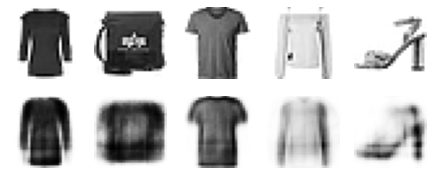

In [ ]:
show_reconstructions(stacked_ae_1_by_1)
plt.show()

In [ ]:
stacked_ae_1_by_1.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
sequential_3 (Sequential)    (None, 100)               78500     
_________________________________________________________________
sequential_6 (Sequential)    (None, 30)                3030      
_________________________________________________________________
sequential_7 (Sequential)    (None, 100)               3100      
_________________________________________________________________
sequential_4 (Sequential)    (None, 784)               79184     
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28)            0         
Total params: 163,814
Trainable params: 163,814
Non-trainable params: 0
________________________________________________